ref : https://twinsynergy.co.th/70-machine-learning-datasets-project-ideas/

dataset : https://archive.ics.uci.edu/ml/datasets/parkinsons

8. Parkinson Dataset

พาร์กินสันเป็นความผิดปกติของระบบประสาทที่ส่งผลต่อการเคลื่อนไหว ชุดข้อมูลประกอบด้วยข้อมูลผู้ป่วยพาร์กินสัน 195 คน ที่มีคุณลักษณะอาการป่วยที่แตกต่างกัน 23 รายการ ที่ได้จากการตรวจวัดทางการแพทย์ ข้อมูลนี้ใช้เพื่อแยกผู้ที่มีสุขภาพแข็งแรงออกจากผู้ที่เป็นโรคพาร์คินสันได้

Data Science Project Idea: แบบจำลองนี้สามารถใช้เพื่อแยกคนที่มีสุขภาพดีออกจากคนที่เป็นโรคพาร์คินสัน โดยใช้อัลกอริทึมที่มีชื่อว่า XGboost ย่อมาจาก Extreme Gradient boosting ซึ่งใช้หลักการของ decision tree 

In this problem, I search more information from https://www.kaggle.com/izzyx6/parkinson-s-disease-detection-using-xgboost

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,

Jitter:DDP - Several 

measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,

MDVP:APQ,Shimmer:DDA - Several measures of variation in 
amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

## Import Libraries

In [12]:
# fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for model
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold
# for normalize
from sklearn.preprocessing import MinMaxScaler
# for xgboost algorithm
from xgboost import XGBClassifier

# Import Dataset

In [13]:
df = pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## Preprocessing

In [14]:
# check missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

don't have missing values!

In [15]:
X = np.array(df.drop(['name','status'], axis = 1))
y = np.array(df['status'])

In [16]:
# normailize
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
# Performing Cross Validation
def crossValidate(model):
    #Using StratifiedKFold to ensure that the divided folds are shuffled
    strat_k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
    
    #Getting just specific scores for perfromance evualation.
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv = cross_validate(model, scaled_X, y, cv = strat_k_fold, scoring = scoring)
    
    '''
    for score in cv:
        print(f'{score}: {round(cv[score].mean(),3)}')
    '''
    
    result = [round(cv[score].mean(),3) for score in cv]
    return result
    

## Model

In [18]:
model = XGBClassifier()
result = crossValidate(model)
result[2:]

[0.932, 0.941, 0.972, 0.956, 0.974]

Text(0.5, 1.0, 'Model Performance')

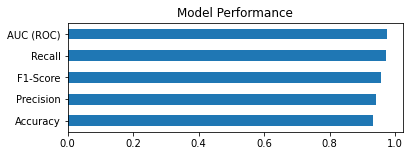

In [19]:
#Giving a plot of the performance metrics used
plt.figure(figsize = (6,2))
model_preformance = pd.Series(data=result[2:], 
        index=['Accuracy','Precision','Recall','F1-Score','AUC (ROC)'])
model_preformance.sort_values().plot.barh()
plt.title('Model Performance')